# Group 2 Project - Dognition
this notebook is for exploring dogniton data
#    II. How do the features of the owners correlate to the number of tests completed?
#        2.3) Dog history, such as dog ownership, interest in breeding, # of dogs owned now or in a lifetime, etc …

In [2]:
#set up of requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import os
import openpyxl

In [8]:
#establish connection to data
dogdf = pd.read_excel("dognition_data_aggregated_by_dogid.xlsx")
display(dogdf)

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,fdc235e0-7144-11e5-ba71-058fbc01cf0b,7,0.009408,13.547222,0.004786,6.891667,0.056447,81.283333,ce9b2aba-7144-11e5-ba71-058fbc01cf0b,male,...,10.0,0.0,NaN,NaN,NaN,NaN,0,0,2015-10-12 14:44:00,1
17982,fdc23a68-7144-11e5-ba71-058fbc01cf0b,1,NaN,NaN,NaN,NaN,0.000000,0.000000,ce9b2eb6-7144-11e5-ba71-058fbc01cf0b,male,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 20:43:00,4
17983,fdc23ba8-7144-11e5-ba71-058fbc01cf0b,20,0.004957,7.137719,0.004201,6.050000,0.094178,135.616667,ce9b306e-7144-11e5-ba71-058fbc01cf0b,female,...,10.0,1.0,Carolina Beach,NC,28428,US,0,0,2015-10-12 20:13:00,1
17984,fdc23e96-7144-11e5-ba71-058fbc01cf0b,4,0.002948,4.244444,0.002778,4.000000,0.008843,12.733333,ce9b33b6-7144-11e5-ba71-058fbc01cf0b,female,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 19:17:00,4


In [9]:
dogdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Dog ID                                           17986 non-null  object 
 1   Total Tests Completed                            17986 non-null  int64  
 2   Mean ITI (days)                                  16718 non-null  float64
 3   Mean ITI (minutes)                               16718 non-null  float64
 4   Median ITI (days)                                16718 non-null  float64
 5   Median ITI (minutes)                             16718 non-null  float64
 6   Time diff between first and last game (days)     17986 non-null  float64
 7   Time diff between first and last game (minutes)  17986 non-null  float64
 8   User ID                                          17985 non-null  object 
 9   Gender                      

In [ ]:
dogdf.describe()

In [5]:
#2.3 Dog history, such as dog ownership, interest in breeding, # of dogs owned now or in a lifetime, etc …

In [11]:
tests_breed = dogdf[["Total Tests Completed", "Breed"]]
testsperbreed = tests_breed.groupby(['Breed']).get_group('Pug')
print(testsperbreed)

       Total Tests Completed Breed
12                        20   Pug
92                         4   Pug
329                       31   Pug
963                       45   Pug
1035                      16   Pug
...                      ...   ...
17514                     20   Pug
17559                      4   Pug
17605                      1   Pug
17646                      4   Pug
17677                      4   Pug

[107 rows x 2 columns]


/var/folders/xf/scjk1d6504zdn2z0bcqdh6k80000gp/T/ipykernel_84781/3896974732.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  testsperbreed = tests_breed.groupby(['Breed']).get_group('Pug')


In [25]:
totaltests_eachbreed= dogdf.groupby('Breed')['Total Tests Completed'].sum()
print(totaltests_eachbreed)

Breed
Affenpinscher                                      98
Affenpinscher-Brussels Griffon                     20
Afghan Hound                                       65
Afghan Hound-Akita                                  3
Afghan Hound-Golden Retriever                      20
                                                 ... 
Yorkshire Terrier-Poodle                          190
Yorkshire Terrier-Rat Terrier                      20
Yorkshire Terrier-Shih Tzu                         64
Yorkshire Terrier-Silky Terrier                    27
Yorkshire Terrier-Soft Coated Wheaten Terrier       5
Name: Total Tests Completed, Length: 1325, dtype: int64


In [26]:
dogdf = dogdf[~dogdf['Breed'].isin([0, 'Mixed'])]
dogdf['Breed'] = dogdf['Breed'].str.replace(r'Mix', 'mix', regex=True, case=False)
totaltests_eachbreed= dogdf.groupby('Breed')['Total Tests Completed'].sum()
print(totaltests_eachbreed)

Breed
Affenpinscher                                      98
Affenpinscher-Brussels Griffon                     20
Afghan Hound                                       65
Afghan Hound-Akita                                  3
Afghan Hound-Golden Retriever                      20
                                                 ... 
Yorkshire Terrier-Poodle                          190
Yorkshire Terrier-Rat Terrier                      20
Yorkshire Terrier-Shih Tzu                         64
Yorkshire Terrier-Silky Terrier                    27
Yorkshire Terrier-Soft Coated Wheaten Terrier       5
Name: Total Tests Completed, Length: 1325, dtype: int64


<Axes: xlabel='Breed'>

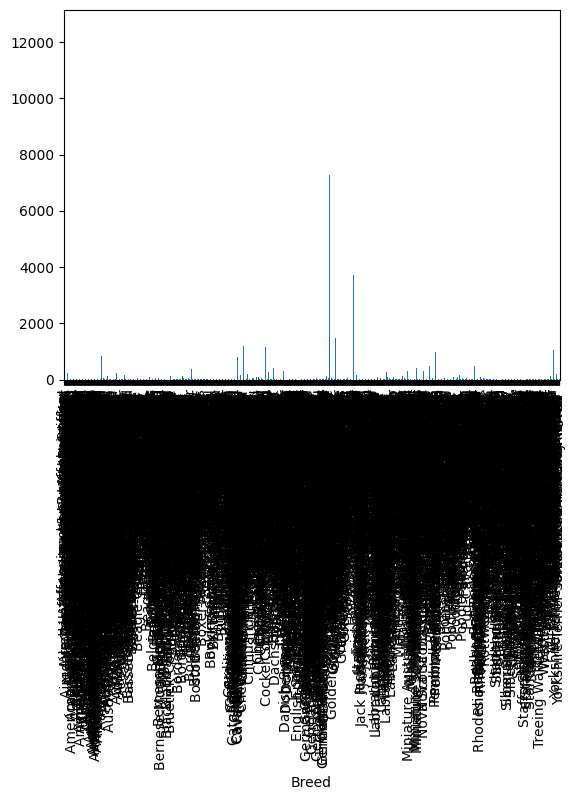

In [27]:
totaltests_eachbreed.plot(x = 'Breed', y = 'Total Tests Completed', kind = 'bar')

In [28]:
Total_Tests_Completed_series = dogdf['Total Tests Completed']
type(Total_Tests_Completed_series)

pandas.core.series.Series